## Import the Dependencies

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Build Data Loading Function

In [2]:
def load_wav_16k_mono(filename):
    file_contents=tf.io.read_file(filename)
    wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)
    wav=tf.squeeze(wav,axis=-1)
    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
    return wav

In [3]:
CAPUCHIN_FILE = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips','XC3776-0.wav')
NON_CAPUCHIN_FILE = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Not_Capuchinbird_Clips','Crickets-chirping-0.wav')

In [4]:
CAPUCHIN_FILE

'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC3776-0.wav'

In [5]:
NON_CAPUCHIN_FILE

'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav'

In [6]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NON_CAPUCHIN_FILE)

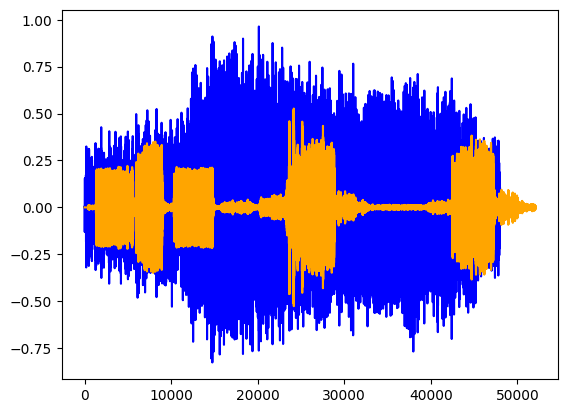

In [7]:
plt.plot(wave, color='blue')
plt.plot(nwave, color='orange')

## Create TensorFlow Dataset

### Define Paths to Positive and Negative Data

In [8]:
POSITIVE = os.path.join('/kaggle/input', 'z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips')
NEGATIVE = os.path.join('/kaggle/input', 'z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Not_Capuchinbird_Clips')

### Create TensorFlow Datasets

In [9]:
pos = tf.data.Dataset.list_files(POSITIVE + '/*.wav')
neg = tf.data.Dataset.list_files(NEGATIVE + '/*.wav')

In [10]:
pos.as_numpy_iterator().next()

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC65196-2.wav'

In [11]:
neg.as_numpy_iterator().next()

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/robin-chirping-13.wav'

### Add Labels and Combine Positive and Negative Examples

In [12]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [13]:
len(neg)

593

In [14]:
len(pos)

217

In [15]:
data = positives.concatenate(negatives)

In [16]:
positives.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC433953-10.wav',
 1.0)

In [17]:
negatives.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-4.wav',
 0.0)

In [18]:
data.shuffle(10000).as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/rain-thunder-and-crickets-sound-effect-16.wav',
 0.0)

## Determine Average Length of a Capuchin Call

### Calculate Wave Cycle Length

In [19]:
lengths = []
for file in os.listdir(POSITIVE):
  tensor_wave = load_wav_16k_mono(os.path.join(POSITIVE, file))
  lengths.append(len(tensor_wave))

In [20]:
lengths

[64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 56000,
 55999,
 72000,
 48000,
 56000,
 56000,
 40000,
 40000,
 56000,
 56000,
 64000,
 32000,
 56000,
 64000,
 40000,
 48000,
 64000,
 56000,
 40000,
 64000,
 48000,
 56000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 72000,
 48000,
 48000,
 64000,
 39999,
 64000,
 56000,
 64000,
 56000,
 40000,
 64000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 72000,
 40000,
 48000,
 40000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 40000,
 48000,
 64000,
 56000,
 40000,
 56000,
 32000,
 56000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 56000,
 48000,
 48000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 72000,
 56000,
 56000,
 48000,
 40000,
 48000,
 64000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,


### Calculate Mean, Max and Min

In [21]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [22]:
54156/16000

3.38475

In [23]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [24]:
32000/16000

2.0

In [25]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [26]:
80000/16000

5.0

## Build Preprocessing Function to Convert our Data into a Spectrogram

In [27]:
def preprocess(file_path, label):
  wav = load_wav_16k_mono(file_path)
  wav = wav[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)

  return spectrogram, label

### Test out the Function and Visualize Spectrogram

In [28]:
file_path, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [29]:
spectrogram, label = preprocess(file_path, label)

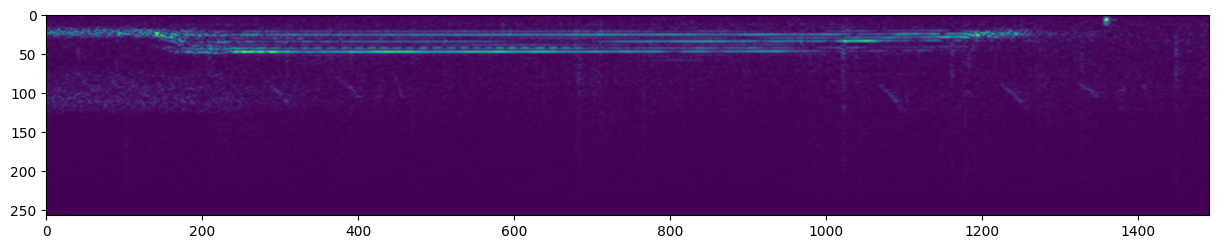

In [30]:
plt.figure(figsize=(15, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [31]:
file_path, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [32]:
spectrogram, label = preprocess(file_path, label)

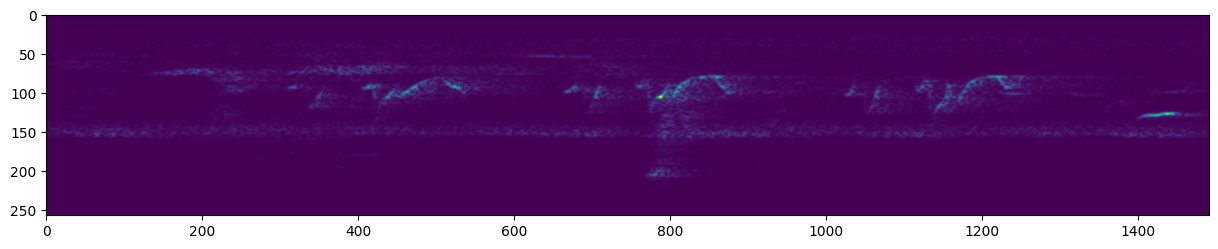

In [33]:
plt.figure(figsize=(15, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

## Create Training and Testing Partitions

### Create a TensorFlow Data Pipeline

In [34]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=10000)
data = data.batch(16)
data = data.prefetch(8)

### Split Data into Training and Testing Partitions

In [35]:
len(data)

51

In [36]:
len(data) * 0.7

35.699999999999996

In [37]:
len(data) * 0.3

15.299999999999999

In [38]:
train = data.take(36)
test = data.skip(36).take(15)

### Test One Batch

In [39]:
samples, labels = train.as_numpy_iterator().next()

In [40]:
samples.shape

(16, 1491, 257, 1)

## Build Deep Learning Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [42]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile('Adam', loss='BinaryCrossentropy', 
              metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770482865 (2.87 GB)
Trainable params: 770482865 (2.87 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit Model, View Loss and KPI Plots

In [45]:
hist = model.fit(train, epochs=25, validation_data=test)

Epoch 1/25
36/36 [==============================] - 17s 197ms/step - loss: 12.5429 - accuracy: 0.7882 - recall: 0.9013 - precision: 0.8012 - val_loss: 3.3108 - val_accuracy: 0.7821 - val_recall: 1.0000 - val_precision: 0.8767
Epoch 2/25
36/36 [==============================] - 6s 177ms/step - loss: 1.9413 - accuracy: 0.9184 - recall: 0.9868 - precision: 0.9434 - val_loss: 4.0210e-19 - val_accuracy: 0.8889 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/25
36/36 [==============================] - 6s 178ms/step - loss: 0.4945 - accuracy: 0.8507 - recall: 0.9673 - precision: 0.9737 - val_loss: 1.2512e-13 - val_accuracy: 0.8974 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/25
36/36 [==============================] - 6s 179ms/step - loss: 0.1909 - accuracy: 0.9115 - recall: 0.9866 - precision: 0.9932 - val_loss: 0.0029 - val_accuracy: 0.9359 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 5/25
36/36 [==============================] - 6s 175ms/step - loss: 0.1144 - accuracy: 0

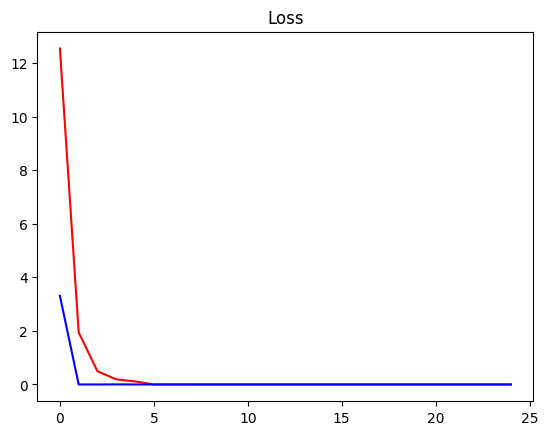

In [46]:
plt.title('Loss')
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.show()

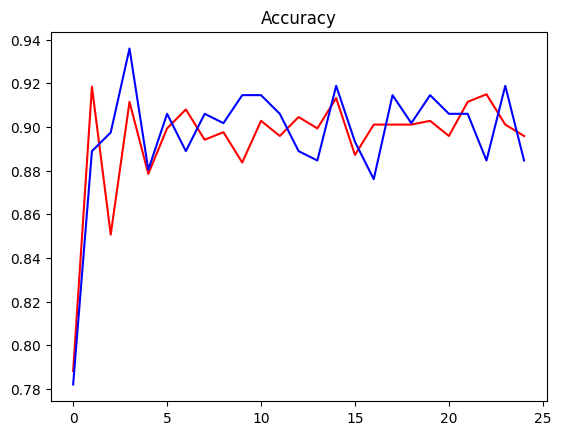

In [47]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], color='red')
plt.plot(hist.history['val_accuracy'], color='blue')
plt.show()

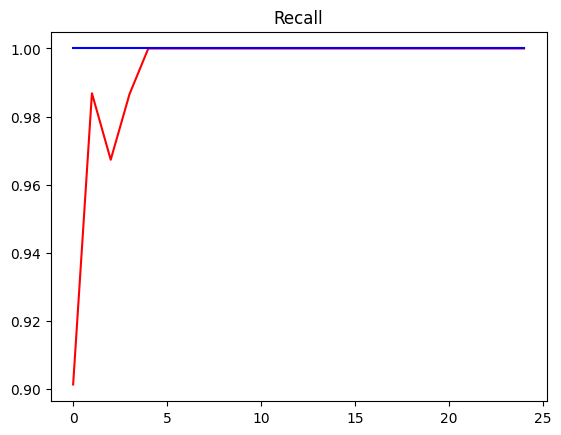

In [48]:
plt.title('Recall')
plt.plot(hist.history['recall'], color='red')
plt.plot(hist.history['val_recall'], color='blue')
plt.show()

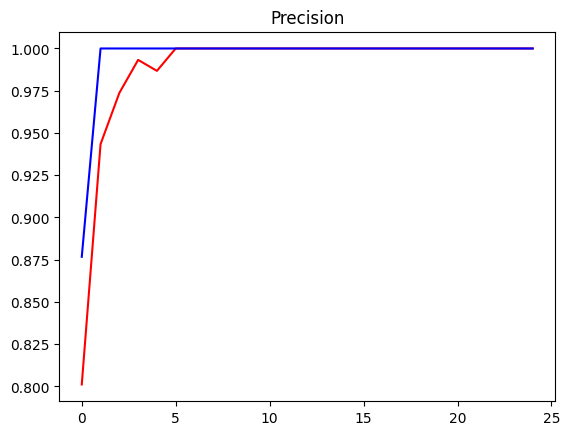

In [49]:
plt.title('Precision')
plt.plot(hist.history['precision'], color='red')
plt.plot(hist.history['val_precision'], color='blue')
plt.show()

## Make Prediction on a Single Clip

### Get One Batch and Make a Prediction

In [50]:
X_test, y_test = test.as_numpy_iterator().next()

In [51]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 104ms/step


In [52]:
y_pred

array([[4.2527651e-14],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.8935808e-14],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [6.4839505e-14],
       [1.0000000e+00]], dtype=float32)

In [53]:
y_pred = [1 if prediction > 0.99 else 0 for prediction in y_pred]
y_pred

[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [54]:
y_test

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [55]:
tf.math.reduce_sum(y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [56]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

## Build Forest Parsing Functions

### Load Up MP3s

In [57]:
def load_mp3_16k_mono(filename):
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [58]:
mp3 = os.path.join('/kaggle/input', 'z-by-hp-unlocked-challenge-3-signal-processing', 'Forest Recordings', 'recording_00.mp3')

In [59]:
wav = load_mp3_16k_mono(mp3)

In [60]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, 
                                                            sequence_length=48000, 
                                                            sequence_stride=48000, 
                                                            batch_size=1)


In [61]:
sample, index = audio_slices.as_numpy_iterator().next()

### Build Function to Convert Clips into Windowed Spectrograms

In [62]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

### Convert Longer Clips into Windows and Make Predictions

In [63]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, 
                                                            sequence_length=16000, 
                                                            sequence_stride=16000, 
                                                            batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)


In [64]:
y_pred = model.predict(audio_slices)
y_pred = [1 if prediction > 0.99 else 0 for prediction in y_pred]

3/3 [==============================] - 5s 912ms/step


### Group Consecutive Detections

In [65]:
from itertools import groupby

In [66]:
y_pred = [key for key, group in groupby(y_pred)]
calls = tf.math.reduce_sum(y_pred).numpy()

In [67]:
calls

5

## Make Predictions

### Loop Over All Recordings and Make Predictions

In [68]:
results = {}
for file in os.listdir(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Forest Recordings')):
    FILEPATH = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

1/1 [==============================] - 1s 609ms/step


In [69]:
results

{'recording_76.mp3': array([[0.0000000e+00],
        [0.0000000e+00],
        [2.3018794e-28],
        [3.0998146e-33],
        [7.2595460e-33],
        [9.9148291e-33],
        [7.8603378e-28],
        [4.5800365e-35],
        [1.9838971e-36],
        [6.8821887e-21],
        [3.7744654e-22],
        [5.3005427e-21],
        [4.0258370e-26],
        [2.3769412e-22],
        [4.3977625e-12],
        [9.4678525e-22],
        [1.2327733e-23],
        [1.0585907e-22],
        [3.5186315e-37],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
     

### Convert Predictions into Classes

In [70]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_76.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_62.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_48.mp3': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_44.mp3': [0,
  0,
  0,
  

### Group Consecutive Detections

In [71]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_76.mp3': 0,
 'recording_62.mp3': 0,
 'recording_48.mp3': 4,
 'recording_44.mp3': 1,
 'recording_45.mp3': 3,
 'recording_06.mp3': 9,
 'recording_43.mp3': 5,
 'recording_68.mp3': 1,
 'recording_95.mp3': 5,
 'recording_17.mp3': 6,
 'recording_65.mp3': 5,
 'recording_74.mp3': 0,
 'recording_10.mp3': 5,
 'recording_49.mp3': 0,
 'recording_15.mp3': 2,
 'recording_37.mp3': 3,
 'recording_64.mp3': 3,
 'recording_39.mp3': 2,
 'recording_04.mp3': 7,
 'recording_28.mp3': 11,
 'recording_05.mp3': 0,
 'recording_80.mp3': 1,
 'recording_57.mp3': 4,
 'recording_12.mp3': 0,
 'recording_59.mp3': 2,
 'recording_67.mp3': 0,
 'recording_09.mp3': 0,
 'recording_79.mp3': 0,
 'recording_14.mp3': 0,
 'recording_63.mp3': 4,
 'recording_86.mp3': 2,
 'recording_47.mp3': 4,
 'recording_03.mp3': 0,
 'recording_33.mp3': 0,
 'recording_08.mp3': 15,
 'recording_51.mp3': 3,
 'recording_35.mp3': 0,
 'recording_81.mp3': 5,
 'recording_30.mp3': 3,
 'recording_88.mp3': 0,
 'recording_75.mp3': 1,
 'recording_46

## Export Results

In [72]:
import csv

In [74]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])